# ML Assignment 5
## Yash S Sankh
## Roll no : 52
Title : Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute confusion
matrix, accuracy, error rate, precision and recall on the given dataset.
Dataset link : https://www.kaggle.com/datasets/abdallamahgoub/diabetes

# Libraries and Classes

In [20]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
import numpy as np
!pip install imbalanced-learn 

ERROR: Invalid requirement: '#oversampling'


In [21]:
# Reading CSV dataset 
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Defining variables x and y 

In [22]:
x=df.drop('Outcome', axis=1)
y=df['Outcome']

<AxesSubplot: xlabel='Outcome', ylabel='count'>

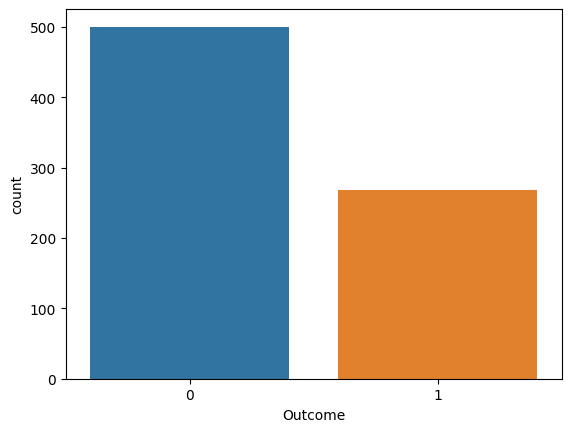

In [23]:
sns.countplot(x=y)

In [24]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Over sampling of imbalanced values 

In [25]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_yes,y_res=ros.fit_resample(x,y)
y_res.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

# Scaling of features using min-max scaling technique

In [26]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x_yes)
x_scaled

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.05882353, 0.90954774, 0.52459016, ..., 0.50819672, 0.10674637,
        0.28333333],
       [0.35294118, 0.59798995, 0.40983607, ..., 0.40387481, 0.529462  ,
        0.2       ],
       [0.41176471, 0.51758794, 0.54098361, ..., 0.58271237, 0.11357814,
        0.16666667]])

# Spliting datset into training and testing dataset in ratio 75:25

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_res,random_state=0,test_size=0.25)
print(x_scaled.shape)
print(x_test,x_train)

(1000, 8)
[[0.         0.73366834 0.57377049 ... 0.56482861 0.10930828 0.11666667]
 [0.29411765 0.83417085 0.62295082 ... 0.68107303 0.1118702  0.1       ]
 [0.82352941 0.50251256 0.63934426 ... 0.54545455 0.14261315 0.41666667]
 ...
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 [0.47058824 0.63316583 0.60655738 ... 0.38599106 0.03586678 0.3       ]
 [0.41176471 0.71356784 0.73770492 ... 0.45305514 0.02134927 0.36666667]] [[0.         0.4321608  0.55737705 ... 0.53353204 0.06831768 0.06666667]
 [0.58823529 0.55778894 0.57377049 ... 0.40983607 0.02690009 0.31666667]
 [0.11764706 0.55276382 0.60655738 ... 0.4828614  0.264731   0.1       ]
 ...
 [0.23529412 0.47236181 0.53278689 ... 0.3681073  0.02988898 0.        ]
 [0.64705882 0.42713568 0.60655738 ... 0.4485842  0.09479078 0.23333333]
 [0.29411765 0.68341709 0.67213115 ... 0.         0.23996584 0.8       ]]


# Model training using KNN algo.

In [28]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
y_pred=knn.predict(x_test)
print(x_test,y_pred)

[[0.         0.73366834 0.57377049 ... 0.56482861 0.10930828 0.11666667]
 [0.29411765 0.83417085 0.62295082 ... 0.68107303 0.1118702  0.1       ]
 [0.82352941 0.50251256 0.63934426 ... 0.54545455 0.14261315 0.41666667]
 ...
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 [0.47058824 0.63316583 0.60655738 ... 0.38599106 0.03586678 0.3       ]
 [0.41176471 0.71356784 0.73770492 ... 0.45305514 0.02134927 0.36666667]] [0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1
 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0
 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0
 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1
 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1
 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1]


# Performance of model using confusion matrix

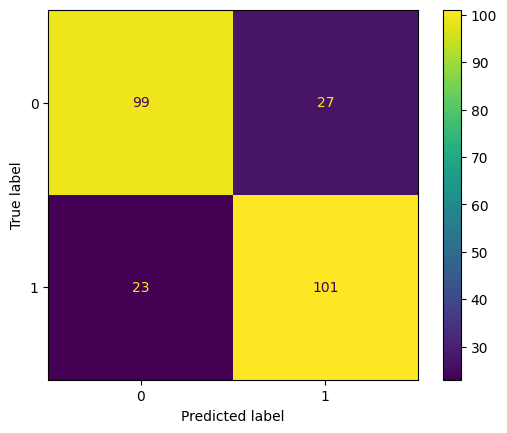

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       126
           1       0.79      0.81      0.80       124

    accuracy                           0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.80      0.80      0.80       250



# Calculating error of model

In [32]:
error=[]
for k in range (1,41):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    error.append(np.mean(pred !=y_test))

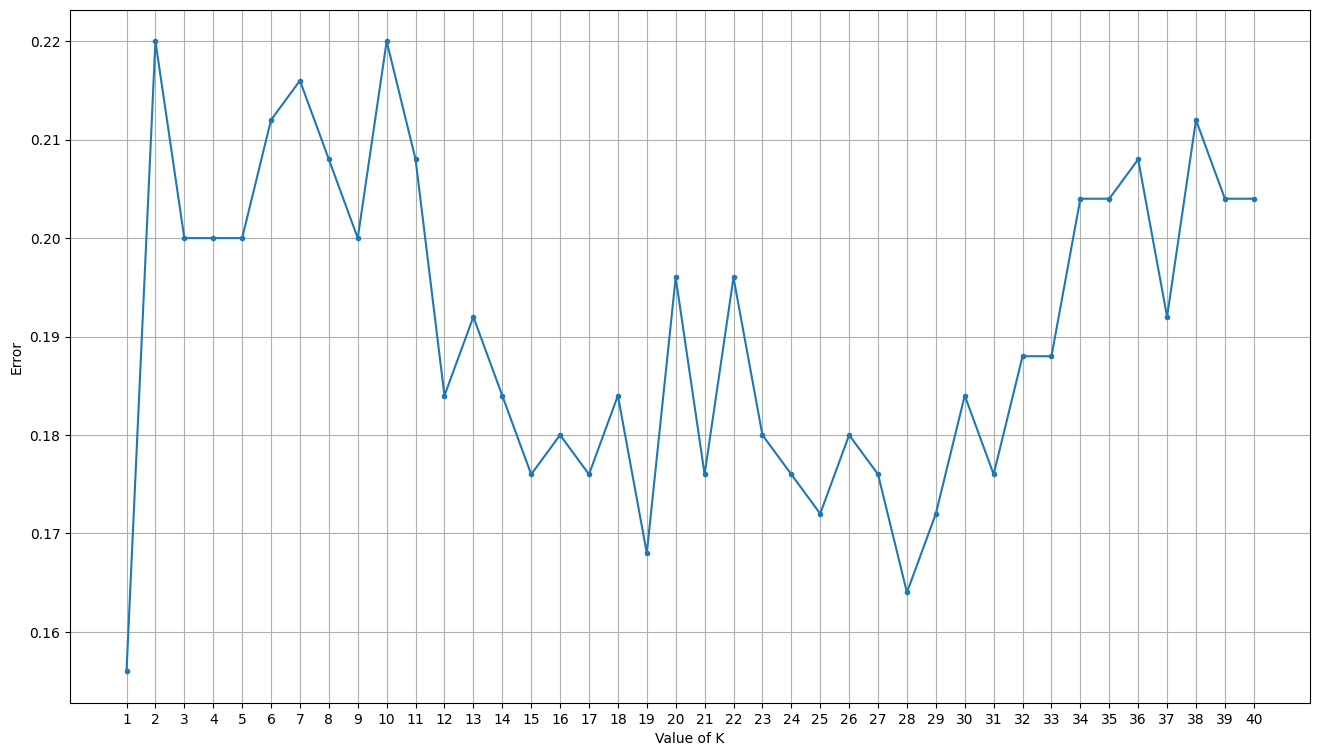

In [33]:
plt.figure(figsize=(16,9))
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41),error,marker='.')

# Trained model for least error at value of k as 28

In [34]:
knn=KNeighborsClassifier(n_neighbors=28)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       126
           1       0.84      0.82      0.83       124

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250

